## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [35]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [36]:
df_mat = pd.read_csv('data/student-mat.csv', sep = ';')

#### Show Top 5 Records

In [37]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Preparing X and Y variables

In [38]:
X = df_mat.drop(columns=['G3'],axis=1)

In [39]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


In [40]:
for column in df_mat.columns:
    print(f"Categories in {column} variable:     ",end=" " )
    print(df_mat[column].unique())

Categories in school variable:      ['GP' 'MS']
Categories in sex variable:      ['F' 'M']
Categories in age variable:      [18 17 15 16 19 22 20 21]
Categories in address variable:      ['U' 'R']
Categories in famsize variable:      ['GT3' 'LE3']
Categories in Pstatus variable:      ['A' 'T']
Categories in Medu variable:      [4 1 3 2 0]
Categories in Fedu variable:      [4 1 2 3 0]
Categories in Mjob variable:      ['at_home' 'health' 'other' 'services' 'teacher']
Categories in Fjob variable:      ['teacher' 'other' 'services' 'health' 'at_home']
Categories in reason variable:      ['course' 'other' 'home' 'reputation']
Categories in guardian variable:      ['mother' 'father' 'other']
Categories in traveltime variable:      [2 1 3 4]
Categories in studytime variable:      [2 3 1 4]
Categories in failures variable:      [0 3 2 1]
Categories in schoolsup variable:      ['yes' 'no']
Categories in famsup variable:      ['no' 'yes']
Categories in paid variable:      ['no' 'yes']
Categorie

In [41]:
y = df_mat['G3']

In [42]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [43]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [44]:
X = preprocessor.fit_transform(X)

In [45]:
X.shape

(395, 58)

In [46]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((316, 58), (79, 58))

#### Create an Evaluate Function to give all metrics after model Training

In [47]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [48]:
models = {
    "SVC": SVC(),
    "Elastic Net": ElasticNet(),
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

SVC
Model performance for Training set
- Root Mean Squared Error: 1.8315
- Mean Absolute Error: 0.8228
- R2 Score: 0.8403
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.9265
- Mean Absolute Error: 2.6835
- R2 Score: 0.2481


Elastic Net
Model performance for Training set
- Root Mean Squared Error: 2.3795
- Mean Absolute Error: 1.5319
- R2 Score: 0.7304
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3408
- Mean Absolute Error: 1.5613
- R2 Score: 0.7328


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.6802
- Mean Absolute Error: 1.1647
- R2 Score: 0.8656
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3787
- Mean Absolute Error: 1.6471
- R2 Score: 0.7241


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.1665
- Mean Absolute Error: 1.3234
- R2 Score: 0.7765
----------------------------------


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0012
- Mean Absolute Error: 0.0007
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2053
- Mean Absolute Error: 1.2649
- R2 Score: 0.7628


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0997
- Mean Absolute Error: 0.0714
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.9681
- Mean Absolute Error: 1.2890
- R2 Score: 0.8111


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 1.0294
- Mean Absolute Error: 0.8076
- R2 Score: 0.9495
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0501
- Mean Absolute Error: 1.3188
- R2 Score: 0.7950




### Results

In [49]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
9,CatBoosting Regressor,0.811099
7,Random Forest Regressor,0.795142
10,AdaBoost Regressor,0.795036
8,XGBRegressor,0.762820
3,Lasso,0.758139
1,Elastic Net,0.732787
4,Ridge,0.725717
2,Linear Regression,0.724059
6,Decision Tree,0.601827
5,K-Neighbors Regressor,0.526489


## Linear Regression

In [50]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

## Performance evaluation

In [51]:
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 72.41


In [52]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 2.38
R2: 0.72


## Plot y_pred and y_test

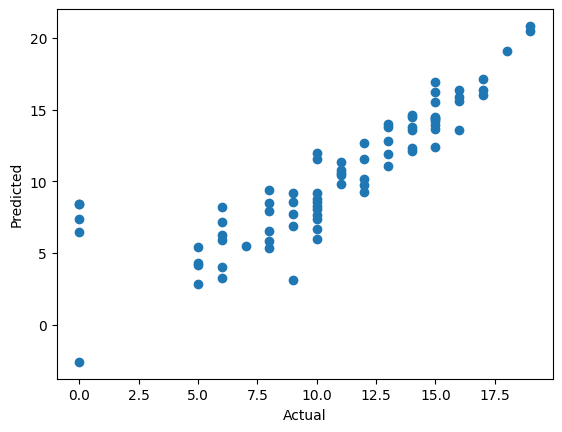

In [53]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

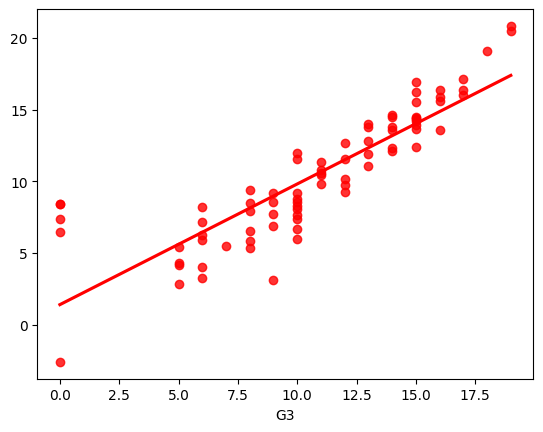

In [54]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [55]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
78,10,5.996094,4.003906
371,12,11.526367,0.473633
248,5,2.868164,2.131836
55,10,8.796875,1.203125
390,9,8.557617,0.442383
...,...,...,...
364,12,10.151367,1.848633
82,6,6.277344,-0.277344
114,9,7.688477,1.311523
3,15,12.409180,2.590820


## Catboost Regressor

In [56]:
model = CatBoostRegressor(verbose=False)
train_dataset = Pool(X_train, y_train) 
test_dataset = Pool(X_test, y_test)
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)


bestTest = 1.887286456
bestIteration = 99

0:	loss: 1.8872865	best: 1.8872865 (0)	total: 47.4ms	remaining: 4.5s

bestTest = 1.52587038
bestIteration = 93

1:	loss: 1.5258704	best: 1.5258704 (1)	total: 70.1ms	remaining: 3.29s

bestTest = 1.886437512
bestIteration = 99

2:	loss: 1.8864375	best: 1.5258704 (1)	total: 112ms	remaining: 3.46s

bestTest = 1.485300994
bestIteration = 95

3:	loss: 1.4853010	best: 1.4853010 (3)	total: 164ms	remaining: 3.77s

bestTest = 1.895456227
bestIteration = 99


Iteration with suspicious time -0.144 sec ignored in overall statistics.
4:	loss: 1.8954562	best: 1.4853010 (3)	total: 164ms	remaining: 3.77s

bestTest = 1.499429898
bestIteration = 97

5:	loss: 1.4994299	best: 1.4853010 (3)	total: 181ms	remaining: 3.25s

bestTest = 1.992849867
bestIteration = 99

6:	loss: 1.9928499	best: 1.4853010 (3)	total: 196ms	remaining: 2.91s

bestTest = 1.552229421
bestIteration = 92

7:	loss: 1.5522294	best: 1.4853010 (3)	total: 216ms	remaining: 2.72s

bestTest = 1.61686127

{'params': {'depth': 4,
  'iterations': 150,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

## Performance evaluation

In [57]:
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 81.22


In [58]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 1.96
R2: 0.81


## Plot y_pred and y_test

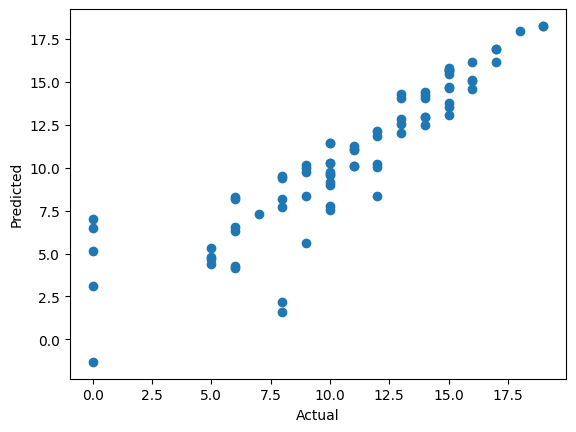

In [59]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

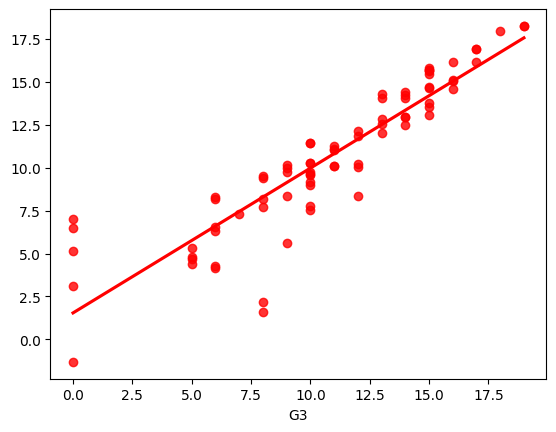

In [60]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [61]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
78,10,7.529616,2.470384
371,12,11.827473,0.172527
248,5,4.406405,0.593595
55,10,10.251720,-0.251720
390,9,9.722197,-0.722197
...,...,...,...
364,12,10.187153,1.812847
82,6,6.306966,-0.306966
114,9,10.169204,-1.169204
3,15,13.731995,1.268005


## Variable importance plot

In [62]:
xval = [column for column in df_mat.columns if column not in ["G3"]]

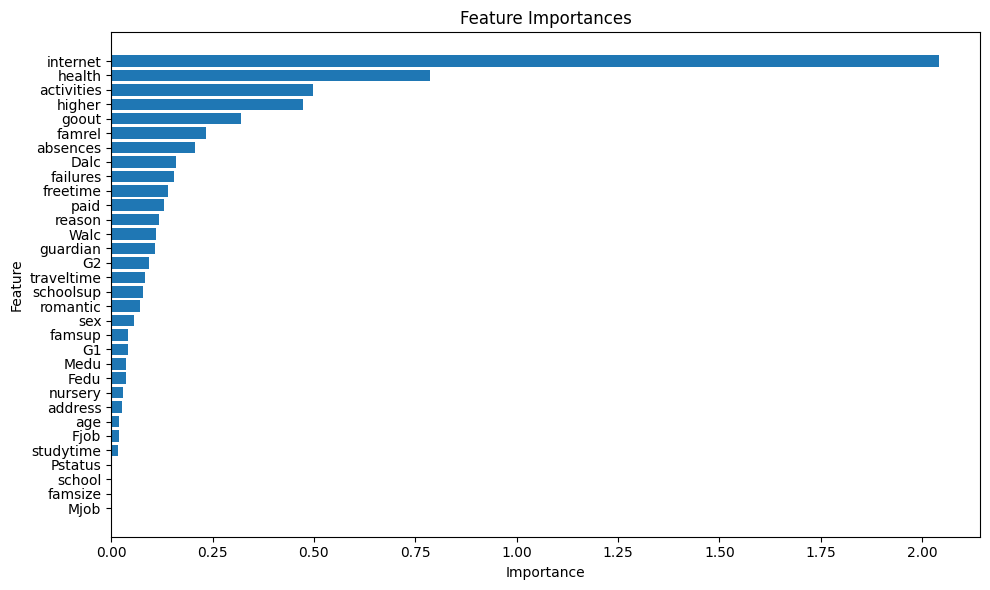

In [63]:
feature_importance = model.get_feature_importance()

# Create a dictionary of feature names and their importance scores
feature_importance_dict = dict(zip(xval, feature_importance))

feature_importance_dict = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}
feature_importance_df = pd.DataFrame(feature_importance_dict.items(), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance')

# Plot the feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()

plt.show()

In [64]:
feature_importance_dict

{'internet': 2.0407462274387282,
 'health': 0.7853999277535575,
 'activities': 0.4971025958416659,
 'higher': 0.4736335293044397,
 'goout': 0.32071718132471133,
 'famrel': 0.23269154594555366,
 'absences': 0.2071788738900665,
 'Dalc': 0.16070438123164751,
 'failures': 0.15410089619122974,
 'freetime': 0.14083073622269776,
 'paid': 0.13063629689789252,
 'reason': 0.11846722897708514,
 'Walc': 0.11156085041585118,
 'guardian': 0.10863146642672643,
 'G2': 0.09241370453193432,
 'traveltime': 0.08411597017866161,
 'schoolsup': 0.07878142383157095,
 'romantic': 0.07177922575539937,
 'sex': 0.05617324170346035,
 'famsup': 0.04088688026898932,
 'G1': 0.04083133726492988,
 'Medu': 0.03688597529683442,
 'Fedu': 0.0365423553857365,
 'nursery': 0.028870515166750172,
 'address': 0.026232542712505035,
 'age': 0.01952622284874719,
 'Fjob': 0.01896999933199929,
 'studytime': 0.017150751562807497,
 'school': 0.0,
 'famsize': 0.0,
 'Pstatus': 0.0,
 'Mjob': 0.0}

In [65]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 1.96
R2: 0.81


## Plot y_pred and y_test

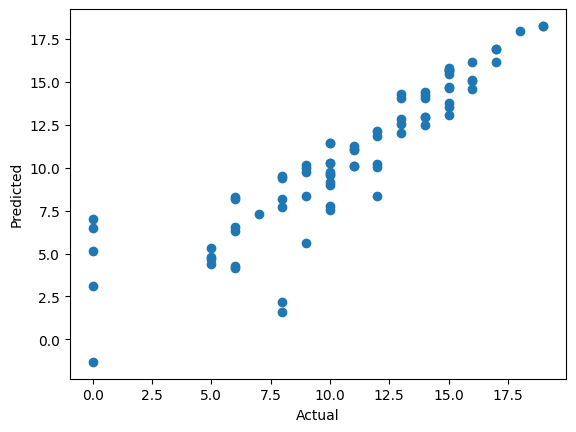

In [66]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

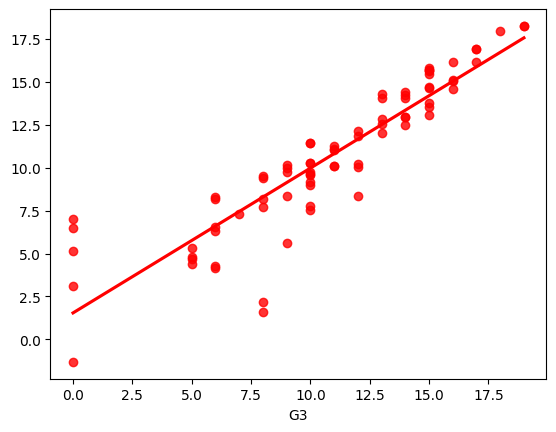

In [67]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [68]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
78,10,7.529616,2.470384
371,12,11.827473,0.172527
248,5,4.406405,0.593595
55,10,10.251720,-0.251720
390,9,9.722197,-0.722197
...,...,...,...
364,12,10.187153,1.812847
82,6,6.306966,-0.306966
114,9,10.169204,-1.169204
3,15,13.731995,1.268005
